<a href="https://colab.research.google.com/github/moustafa-7/PyTorch-Course/blob/master/Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt

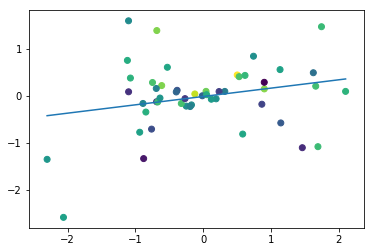

In [6]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n) 

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y,c = colors, alpha = 1)
plt.show()

In [0]:
x_values = [i for i in range(11)]

In [10]:
x_train = np.array(x_values, dtype = np.float32)
x_train.shape

(11,)

In [11]:
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

In [0]:
y_values = [2*i +1 for i in x_values]

In [13]:
y_train = np.array(y_values, dtype = np.float32)
y_train.shape

(11,)

In [0]:
y_train = y_train.reshape(-1,1)


In [45]:
y_train.shape

(11, 1)

# Build the model

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn

## Do a model Class

In [0]:
# create a class

class linear_regression_model(nn.Module):
  def __init__ (self, input_dim, output_dim):
    super(linear_regression_model, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
    
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
input_dim = 1
output_dim = 1

model = linear_regression_model(input_dim, output_dim)

## Create a loss Class

In [0]:
#we will use the mean squared error
criterion = nn.MSELoss()

## Define the optimizer class

In [0]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
# print(model.parameters)
# print(model.parameters())

## Train the model

In [0]:
epochs = 1000

In [56]:
for epoch in range(epochs):
  epoch += 1
  
  inputs = Variable(torch.from_numpy(x_train))#, #requires_grad = True)
  labels = Variable(torch.from_numpy(y_train))#, requires_grad = True)
  
  optimizer.zero_grad()
  
  outputs = model(inputs)
  
  loss = criterion(outputs, labels)
  
  loss.backward()
  
  optimizer.step()

  
  print('epoch {}, loss {}'.format(epoch, loss.data))
  
  

epoch 1, loss 0.034441862255334854
epoch 2, loss 0.03405730798840523
epoch 3, loss 0.03367692232131958
epoch 4, loss 0.03330087289214134
epoch 5, loss 0.03292899951338768
epoch 6, loss 0.032561320811510086
epoch 7, loss 0.032197754830121994
epoch 8, loss 0.03183819353580475
epoch 9, loss 0.03148265928030014
epoch 10, loss 0.031131044030189514
epoch 11, loss 0.03078342415392399
epoch 12, loss 0.030439699068665504
epoch 13, loss 0.03009975329041481
epoch 14, loss 0.02976371720433235
epoch 15, loss 0.029431257396936417
epoch 16, loss 0.029102666303515434
epoch 17, loss 0.02877766266465187
epoch 18, loss 0.02845625951886177
epoch 19, loss 0.02813856117427349
epoch 20, loss 0.02782433107495308
epoch 21, loss 0.027513623237609863
epoch 22, loss 0.02720636874437332
epoch 23, loss 0.0269025806337595
epoch 24, loss 0.026602083817124367
epoch 25, loss 0.026305079460144043
epoch 26, loss 0.026011362671852112
epoch 27, loss 0.025720885023474693
epoch 28, loss 0.025433672592043877
epoch 29, loss 0.

## Save the model

In [0]:
save_model = True

torch.save(model.state_dict(), 'my_first_saved_model.pkl')

In [58]:
model.load_state_dict(torch.load('my_first_saved_model.pkl'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

# GPU implementation of Linear Regression

In [0]:
inp_dim = 1
output_dim = 1

model = linear_regression_model(input_dim, output_dim)

In [0]:
if (torch.cuda.is_available()==True):
  model.cuda()

In [0]:
epochs = 1000

In [0]:
for epoch in range(epochs):
  epoch += 1
  
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(x_train).cuda())#, #requires_grad = True)
    labels = Variable(torch.from_numpy(y_train).cuda())#, requires_grad = True)
  
  else:
    inputs = Variable(torch.from_numpy(x_train))#, #requires_grad = True)
    labels = Variable(torch.from_numpy(y_train))
    
  
  optimizer.zero_grad()
  
  outputs = model(inputs)
  
  loss = criterion(outputs, labels)
  
  loss.backward()
  
  optimizer.step()

  
  print('epoch {}, loss {}'.format(epoch, loss.data))